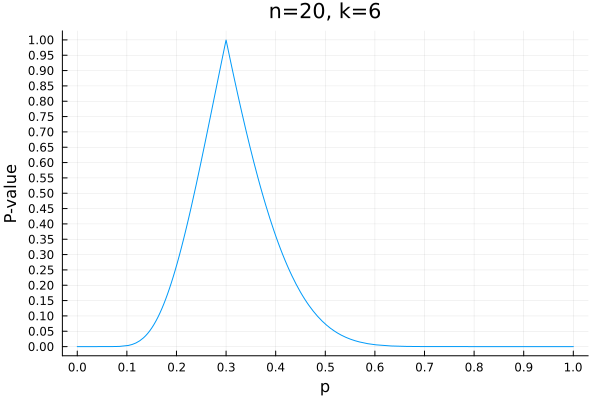

In [1]:
using Distributions
using StatsPlots

function pvalue_wilson(k, n, p)
    s = √(n*p*(1-p))
    2(1 - cdf(Normal(0, s), abs(k - n*p)))
end

plot(p -> pvalue_wilson(6, 20, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="n=20, k=6")

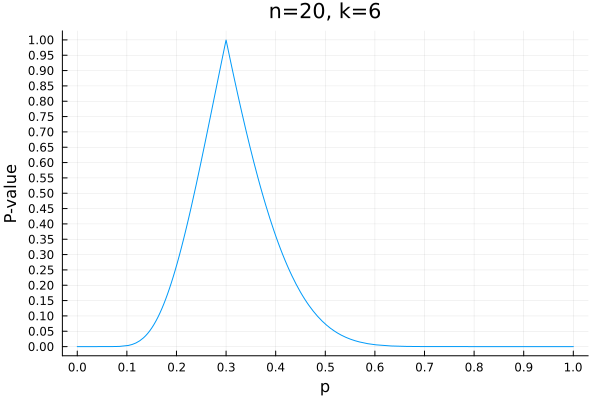

In [2]:
using Distributions
using StatsPlots

function pvalue_wilson(k, n, p)
    s = √(n*p*(1-p))
    2ccdf(Normal(0, s), abs(k - n*p))
end

plot(p -> pvalue_wilson(6, 20, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="n=20, k=6")

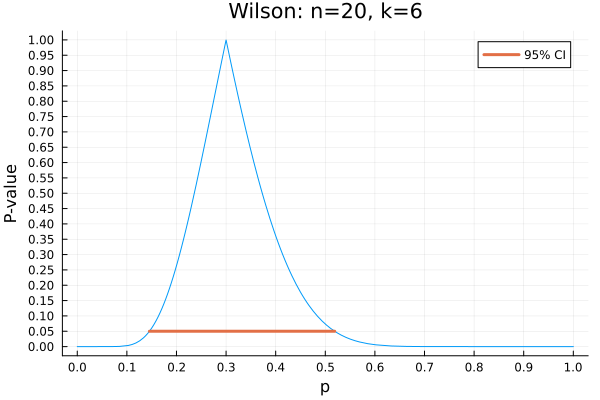

In [3]:
using Distributions
using StatsPlots

function pvalue_wilson(k, n, p)
    s = √(n*p*(1-p))
    2ccdf(Normal(0, s), abs(k - n*p))
end

function confint_wilson(k, n; α = 0.05)
    p̂ = k/n
    z = cquantile(Normal(), α/2)
    a, b, c = 1+z^2/n, p̂+z^2/(2n), p̂^2
    # ap² - 2bp + c = 0 を解く.
    sqrtD = √(b^2 - a*c)
    p_L = (b - sqrtD)/a
    p_U = (b + sqrtD)/a
    [p_L, p_U]
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_wilson(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Wilson: n=$n, k=$k")
plot!(confint_wilson(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

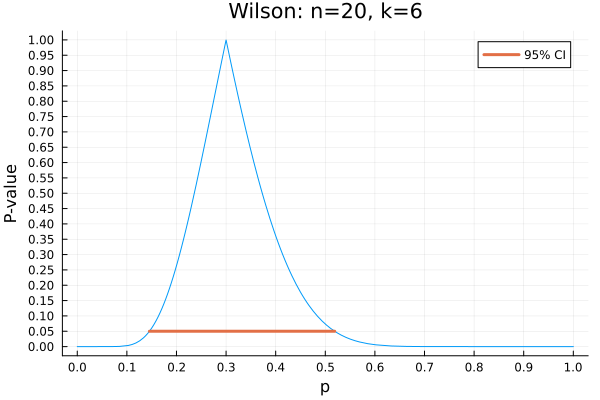

In [4]:
using Distributions
using StatsPlots

function pvalue_wilson(k, n, p)
    ((k == 0 && p == 0) || (k == n && p == 1)) && return one(p)
    s = √(n*p*(1-p))
    z = (k - n*p)/s
    2ccdf(Normal(), abs(z))
end

function confint_wilson(k, n; α = 0.05)
    p̂ = k/n
    z = cquantile(Normal(), α/2)
    a, b, c = 1+z^2/n, p̂+z^2/(2n), p̂^2
    # ap² - 2bp + c = 0 を解く.
    sqrtD = √(b^2 - a*c)
    p_L = (b - sqrtD)/a
    p_U = (b + sqrtD)/a
    [p_L, p_U]
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_wilson(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Wilson: n=$n, k=$k")
plot!(confint_wilson(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

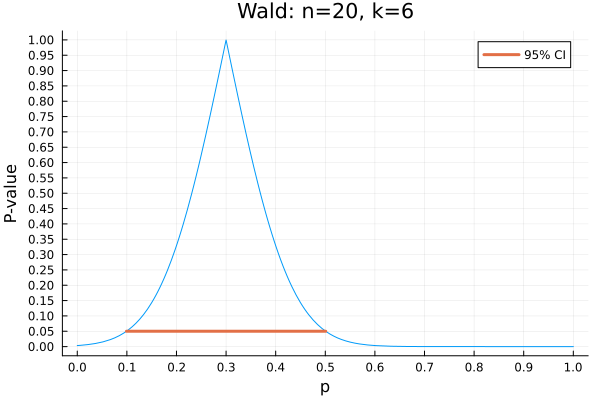

In [5]:
using Distributions
using StatsPlots

function pvalue_wald(k, n, p)
    p̂ = k/n
    ŝ = √(n*p̂*(1-p̂))
    2ccdf(Normal(0, ŝ), abs(k - n*p))
end

function confint_wald(k, n; α = 0.05)
    p̂ = k/n
    sehat = √(p̂*(1-p̂)/n)
    z = cquantile(Normal(), α/2)
    [p̂ - z*sehat, p̂ + z*sehat]
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_wald(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Wald: n=$n, k=$k")
plot!(confint_wald(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

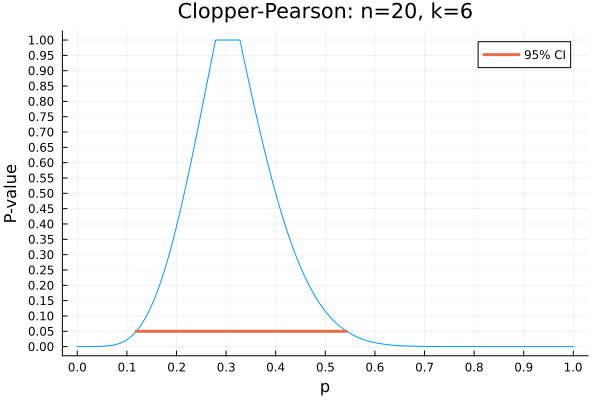

In [6]:
using Distributions
using StatsPlots

function pvalue_clopper_pearson(dist::DiscreteUnivariateDistribution, x)
    min(1, 2cdf(dist, x), 2ccdf(dist, x-1))
end

function pvalue_clopper_pearson(k, n, p)
    bin = Binomial(n, p)
    pvalue_clopper_pearson(bin, k)
end

function confint_clopper_pearson(k, n; α = 0.05)
    p_L = k > 0 ?  quantile(Beta(k, n-k+1), α/2) : zero(α)
    p_U = k < n ? cquantile(Beta(k+1, n-k), α/2) : one(α)
    [p_L, p_U]
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_clopper_pearson(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Clopper-Pearson: n=$n, k=$k")
plot!(confint_clopper_pearson(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

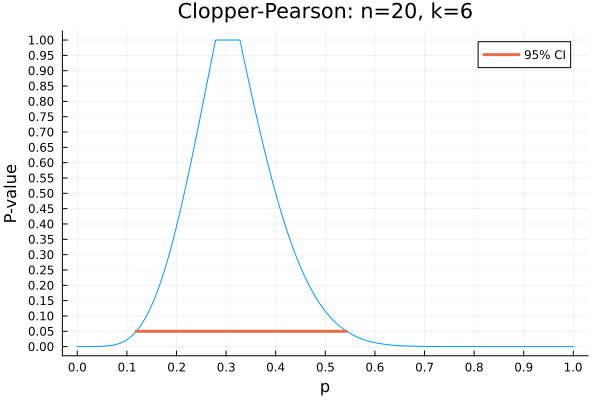

In [7]:
using Distributions
using Roots
using StatsPlots

function pvalue_clopper_pearson(dist::DiscreteUnivariateDistribution, x)
    min(1, 2cdf(dist, x), 2ccdf(dist, x-1))
end

function pvalue_clopper_pearson(k, n, p)
    bin = Binomial(n, p)
    pvalue_clopper_pearson(bin, k)
end

function confint_generic(pvaluefunc, pmin, pmax, α)
    find_zeros(p -> pvaluefunc(p) - α, pmin, pmax)
end

function confint_clopper_pearson(k, n; α = 0.05)
    pvaluefunc(p) = pvalue_clopper_pearson(k, n, p)
    confint_generic(pvaluefunc, 0, 1, α)
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_clopper_pearson(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Clopper-Pearson: n=$n, k=$k")
plot!(confint_clopper_pearson(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

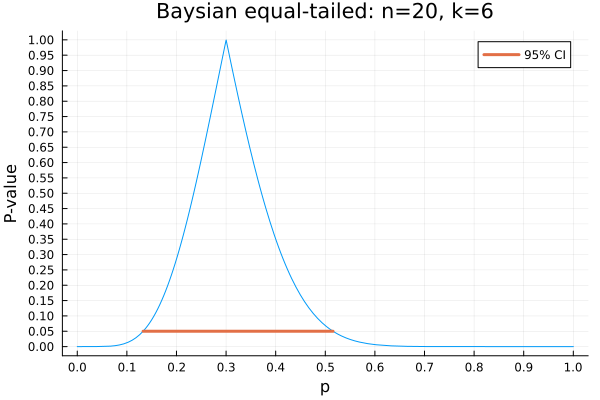

In [8]:
using Distributions
using StatsPlots

function pvalue_bayse_eti(k, n, p; a=1/3, b=1/3)
    beta = Beta(a+k, b+n-k)
    min(1, 2cdf(beta, p), 2ccdf(beta, p))
end

function confint_bayse_eti(k, n; α = 0.05, a=1/3, b=1/3)
    beta = Beta(a+k, b+n-k)
    p_L =  quantile(beta, α/2)
    p_U = cquantile(beta, α/2)
    [p_L, p_U]
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_bayse_eti(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Baysian equal-tailed: n=$n, k=$k")
plot!(confint_bayse_eti(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

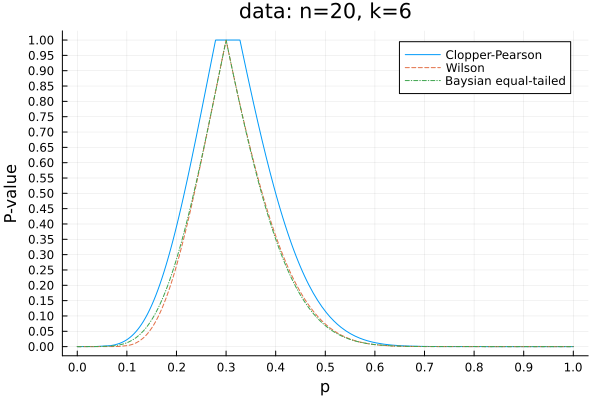

In [9]:
k, n, α = 6, 20, 0.05

plot(p -> pvalue_clopper_pearson(k, n, p), 0, 1; c=1,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Clopper-Pearson")

plot!(p -> pvalue_wilson(k, n, p), 0, 1; c=2, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wilson")

plot!(p -> pvalue_bayse_eti(k, n, p), 0, 1; c=3, ls=:dashdot,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Baysian equal-tailed")

title!("data: n=$n, k=$k")

In [10]:
m, n = 100, 10
A = randn(m, n)
M = mean(A; dims=1)

1×10 Matrix{Float64}:
 0.0512242  -0.223447  -0.0343843  …  -0.0516246  0.0895116  0.077077

In [11]:
v = mean.(eachcol(A))

10-element Vector{Float64}:
  0.0512241831315687
 -0.22344720196619622
 -0.034384264380019465
 -0.11984004759907224
  0.0994746934221978
  0.25519674896343214
 -0.17458106514189653
 -0.05162462352697262
  0.0895116345488951
  0.0770770287398205

In [12]:
vec(M) == v

true

In [13]:
1+1

2

In [14]:
confint_wilson(175, 500)

2-element Vector{Float64}:
 0.30948017314466086
 0.3928071289938047

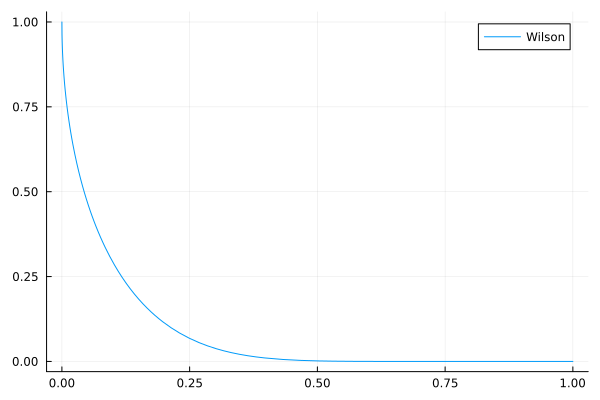

In [15]:
plot(p -> pvalue_wilson(0, 10, p), 0, 1; label="Wilson")

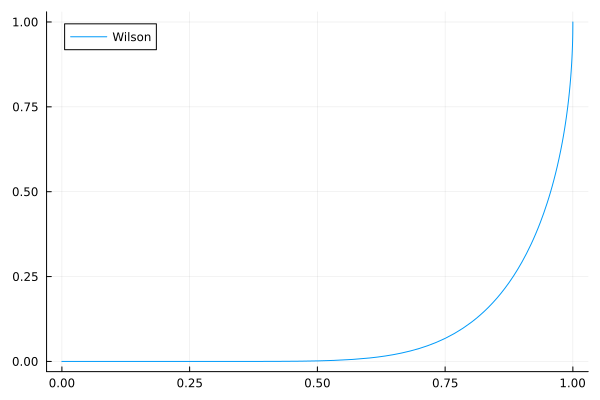

In [16]:
plot(p -> pvalue_wilson(10, 10, p), 0, 1; label="Wilson")